In [78]:

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math 
#Load file names for user. Change here for different user replace 000 or even path as required
filenames = glob.glob("C:/Users/shr7abt/Documents/Location/Data/Geolife Trajectories 1.3/Data/017/Trajectory/200*.plt")

#Read the files
list_of_dfs = [pd.read_csv(filename, skiprows=6, header = None) for filename in filenames]

#put the data from list into one dataframe
combined_df = pd.concat(list_of_dfs, ignore_index=True)

#rename columns
combined_df.columns = ['Latitude', 'Longitude', '0', 'Altitude', 'NumDays', 'Date', 'Time']
combined_df['ClusterId'] = -1
combined_df['ClusterMeanLat'] = -1
combined_df['ClusterMeanLon'] = -1
combined_df['SignificantPlace'] = -1

#add timestamp index
combined_df["Timestamp"] = combined_df["Date"].map(str) + " " + combined_df["Time"]
combined_df.Timestamp = pd.to_datetime(combined_df.Timestamp)
combined_df.index = pd.to_datetime(combined_df.Timestamp)

#combined_df.size
combined_df.head()

,Latitude,Longitude,0,Altitude,NumDays,Date,Time,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,Timestamp
Timestamp,,,,,,,,,,,,
2008-10-30 09:27:48,39.986477,116.320150,0,147.6,39751.394306,2008-10-30,09:27:48,-1,-1,-1,-1,2008-10-30 09:27:48
2008-10-30 09:27:49,39.986480,116.320185,0,147.6,39751.394317,2008-10-30,09:27:49,-1,-1,-1,-1,2008-10-30 09:27:49
2008-10-30 09:27:52,39.986457,116.320282,0,147.6,39751.394352,2008-10-30,09:27:52,-1,-1,-1,-1,2008-10-30 09:27:52
2008-10-30 09:27:55,39.986528,116.320337,0,147.6,39751.394387,2008-10-30,09:27:55,-1,-1,-1,-1,2008-10-30 09:27:55
2008-10-30 09:27:58,39.986525,116.320427,0,147.6,39751.394421,2008-10-30,09:27:58,-1,-1,-1,-1,2008-10-30 09:27:58


In [79]:
#Find distance between two lan:lon points in meters
def meters(lat1, lon1, lat2, lon2):  
    R = 6378.137 # Radius of earth in KM
    dLat = lat2 * math.pi / 180 - lat1 * math.pi / 180
    dLon = lon2 * math.pi / 180 - lon1 * math.pi / 180
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(lat1 * math.pi / 180) * math.cos(lat2 * math.pi / 180) * math.sin(dLon/2) * math.sin(dLon/2);
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a));
    d = R * c
    return d * 1000 # meters

In [80]:
#This function is to cluster the points together if thier distance is less than 50 meters.
def cluster(newlat, newlon, row):

    sampled_df['ClusterId'][row] = -1
    sampled_df['ClusterMeanLat'][row] = -1
    sampled_df['ClusterMeanLon'][row] = -1
    sampled_df['SignificantPlace'][row] = -1
    clulat = sampled_df['ClusterMeanLat'][row-1]
    clulon = sampled_df['ClusterMeanLon'][row-1]

    if meters(clulat, clulon, newlat, newlon)<= 50:
        sampled_df['ClusterId'][row] = sampled_df['ClusterId'][row-1]
        sampled_df['ClusterMeanLat'] = sampled_df.groupby('ClusterId')['Latitude'].transform(np.mean)
        sampled_df['ClusterMeanLon'] = sampled_df.groupby('ClusterId')['Longitude'].transform(np.mean)
    else:
        sampled_df['ClusterMeanLat'][row] = sampled_df['Latitude'][row]
        sampled_df['ClusterMeanLon'][row] = sampled_df['Longitude'][row]
        sampled_df['ClusterId'][row] = sampled_df['ClusterId'][row-1] + 1
    

In [81]:
#Resample the data with every two minutes. Remove this if you like to process the entire file.
#Note, it could take some time to run the further sections of the file size is very large.
sampled_df = combined_df.resample('2T').mean()
sampled_df = sampled_df.sort_values(by=['Latitude', 'Longitude'])
sampled_df = sampled_df.dropna()

#sampled_df.size
sampled_df.tail()

,Latitude,Longitude,0,Altitude,NumDays,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace
Timestamp,,,,,,,,,
2009-01-31 02:12:00,40.990551,117.444637,0.0,1454.781395,39844.092376,-1.0,-1.0,-1.0,-1.0
2009-01-31 02:14:00,40.992110,117.450769,0.0,1452.485366,39844.093783,-1.0,-1.0,-1.0,-1.0
2009-01-31 02:16:00,40.993242,117.459319,0.0,1470.856962,39844.095263,-1.0,-1.0,-1.0,-1.0
2009-01-31 02:18:00,40.994594,117.468098,0.0,1450.003846,39844.096508,-1.0,-1.0,-1.0,-1.0
2009-01-31 02:20:00,40.995201,117.478746,0.0,1436.332143,39844.097895,-1.0,-1.0,-1.0,-1.0


In [82]:
#Read the file in an online manner as the points come and assign the points to clusters
row =1

sampled_df['ClusterId'][row-1] = 0
sampled_df['ClusterMeanLat'][row-1] = sampled_df['Latitude'][0]
sampled_df['ClusterMeanLon'][row-1] = sampled_df['Longitude'][0]
sampled_df['SignificantPlace'][row-1] = -1
while row < len(sampled_df):
    #values are already sorted here. Add this when the process is online
    #sampled_df = sampled_df.sort_values(by=['Latitude', 'Longitude'])
    #import pdb; pdb.set_trace()
    cluster(sampled_df['Latitude'][row], sampled_df['Longitude'][row], row)
    row= row + 1

In [83]:
#Based on distance clusters, now sort the file based on timestamp
sampled_df["Timestamp"] = sampled_df.index
sampled_df = sampled_df.sort_values(by=['Timestamp'])
sampled_df.tail(12)

,Latitude,Longitude,0,Altitude,NumDays,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,Timestamp
Timestamp,,,,,,,,,,
2009-07-04 09:08:00,39.985350,116.336125,0.0,148.076667,39998.381244,10448.0,39.985350,116.336125,-1.0,2009-07-04 09:08:00
2009-07-04 09:10:00,39.984828,116.322379,0.0,140.420408,39998.382300,9778.0,39.984828,116.322379,-1.0,2009-07-04 09:10:00
2009-07-04 11:20:00,39.985007,116.319735,0.0,33.166667,39998.473170,10071.0,39.985007,116.319852,-1.0,2009-07-04 11:20:00
2009-07-04 11:28:00,39.985007,116.319830,0.0,-24.842857,39998.478097,10071.0,39.985007,116.319852,-1.0,2009-07-04 11:28:00
2009-07-04 11:50:00,39.985077,116.319675,0.0,173.900000,39998.493576,10147.0,39.985077,116.319675,-1.0,2009-07-04 11:50:00
2009-07-04 11:52:00,39.985212,116.319682,0.0,173.900000,39998.495544,10313.0,39.985212,116.319682,-1.0,2009-07-04 11:52:00
2009-07-04 11:54:00,39.984560,116.319973,0.0,173.900000,39998.496875,9470.0,39.984560,116.319973,-1.0,2009-07-04 11:54:00
2009-07-04 11:56:00,39.985032,116.319853,0.0,177.200000,39998.498148,10097.0,39.985032,116.319853,-1.0,2009-07-04 11:56:00
2009-07-04 11:58:00,39.984956,116.319632,0.0,173.900000,39998.498848,9987.0,39.984956,116.319632,-1.0,2009-07-04 11:58:00


In [84]:
#remove the points which belong to single cluster. This is done to avoid the intermediate transition points.
sampled_df["ClusCount"] = sampled_df['Latitude'].groupby(sampled_df['ClusterId']).transform('count')
sampled_df = sampled_df.drop(sampled_df[sampled_df.ClusCount<2].index)
sampled_df.tail()

,Latitude,Longitude,0,Altitude,NumDays,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,Timestamp,ClusCount
Timestamp,,,,,,,,,,,
2009-07-04 08:50:00,40.040579,116.405288,0.0,70.632353,39998.368580,14696.0,40.040340,116.405286,-1.0,2009-07-04 08:50:00,3.0
2009-07-04 09:02:00,39.999003,116.380524,0.0,113.525843,39998.377069,11840.0,39.999004,116.380536,-1.0,2009-07-04 09:02:00,2.0
2009-07-04 11:20:00,39.985007,116.319735,0.0,33.166667,39998.473170,10071.0,39.985007,116.319852,-1.0,2009-07-04 11:20:00,3.0
2009-07-04 11:28:00,39.985007,116.319830,0.0,-24.842857,39998.478097,10071.0,39.985007,116.319852,-1.0,2009-07-04 11:28:00,3.0
2009-07-04 12:08:00,39.984942,116.319663,0.0,183.700000,39998.505926,9956.0,39.984941,116.319774,-1.0,2009-07-04 12:08:00,2.0


In [85]:
#Check time difference between two points. If more than threshold(15 min) and they belong to same cluster, or
# if the cluster count is more than 50,
#  then mark this as significant place
#  hence assign 0 to col significant place
row = 0
last_chk_row = 0
while row < len(sampled_df)-1:
    for j in range(row + 1, len(sampled_df)):
        #import pdb; pdb.set_trace()
        last_chk_row = j
        if (sampled_df['ClusterId'][j] == sampled_df['ClusterId'][row]):
            k =sampled_df['Timestamp'][j]-sampled_df['Timestamp'][row]
            l = (k / np.timedelta64(1, 'm')).astype(int)
            if (l>= 15 and l<=1440) or sampled_df['ClusCount'][row] >= 50:
                #import pdb; pdb.set_trace()
                sampled_df.loc[ (sampled_df['ClusterId']==sampled_df['ClusterId'][row]), 'SignificantPlace'] = 0 
        else:
            break
    row = last_chk_row

sampled_df.head()

,Latitude,Longitude,0,Altitude,NumDays,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,Timestamp,ClusCount
Timestamp,,,,,,,,,,,
2008-10-30 09:28:00,39.988066,116.320975,0.0,147.330556,39751.395138,11300.0,39.988065,116.321001,-1.0,2008-10-30 09:28:00,2.0
2008-10-30 09:36:00,39.994741,116.327676,0.0,133.315789,39751.400783,11668.0,39.994733,116.327660,-1.0,2008-10-30 09:36:00,2.0
2008-10-30 09:40:00,39.997710,116.331311,0.0,136.900000,39751.403864,11784.0,39.997734,116.331338,-1.0,2008-10-30 09:40:00,2.0
2008-10-30 09:42:00,39.999591,116.332173,0.0,132.753571,39751.404827,11866.0,39.999608,116.332207,-1.0,2008-10-30 09:42:00,2.0
2008-10-30 09:44:00,40.002579,116.333549,0.0,137.717143,39751.406221,12024.0,40.002580,116.333598,-1.0,2008-10-30 09:44:00,2.0


In [89]:
#copy the significant places into another dataframe for visualization
signig_df = sampled_df.loc[sampled_df['SignificantPlace'] == 0]
signig_df['ClusterId'].nunique()


51

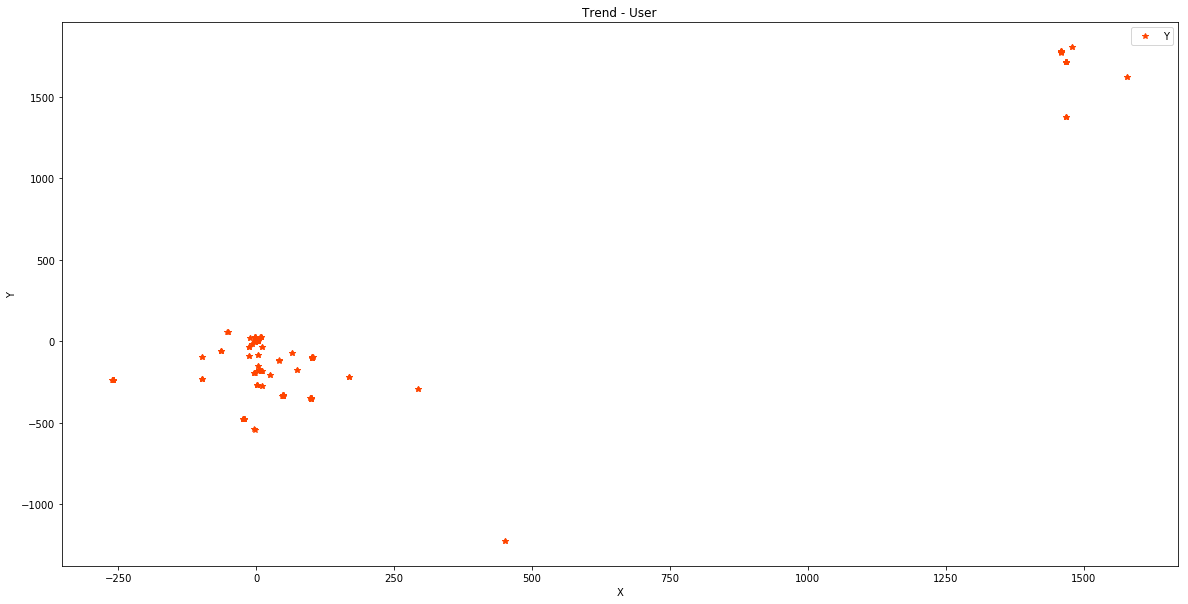

In [90]:
#Plot the significant places
#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(combined_df["Latitude"][0])
origin_lon = math.radians(combined_df["Longitude"][0])
signig_df = signig_df.reset_index(drop=True)

#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(signig_df["Latitude"][0])
origin_lon = math.radians(signig_df["Longitude"][0])

#convert each lat and lon into x and y for the plot w.r.t origin
EARTH_RAD = 6378100
signig_df['X'] = 0.0
signig_df['Y'] = 0.0
for i in range(0, len(signig_df)):
    x = 0
    y = 0
    current_lat = math.radians(signig_df["Latitude"][i])
    current_lon = math.radians(signig_df["Longitude"][i])
    x = ((math.cos(current_lat) + math.cos(origin_lat))/2) * EARTH_RAD * (current_lon - origin_lon) * math.pi / 180
    y = (current_lat - origin_lat)* math.pi/180 * EARTH_RAD
    signig_df.at[i, 'X'] = x
    signig_df.at[i, 'Y'] = y

#plot the x and y's
signig_df.plot(x='X', y= 'Y' , style='*', figsize=(20,10), color='orangered')
plt.title('Trend - User')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [91]:
#sampled_df.loc[sampled_df['ClusterId'] == 14551]
#sampled_df.size
#sampled_df['ClusterId'].nunique()


In [92]:
#add col popularity which is clus count/ total unique clusters * 100
sampled_df['Pop%'] = (sampled_df['ClusCount']/sampled_df['ClusterId'].nunique()) * 100
sampled_df.head()

,Latitude,Longitude,0,Altitude,NumDays,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,Timestamp,ClusCount,Pop%
Timestamp,,,,,,,,,,,,
2008-10-30 09:28:00,39.988066,116.320975,0.0,147.330556,39751.395138,11300.0,39.988065,116.321001,-1.0,2008-10-30 09:28:00,2.0,0.088106
2008-10-30 09:36:00,39.994741,116.327676,0.0,133.315789,39751.400783,11668.0,39.994733,116.327660,-1.0,2008-10-30 09:36:00,2.0,0.088106
2008-10-30 09:40:00,39.997710,116.331311,0.0,136.900000,39751.403864,11784.0,39.997734,116.331338,-1.0,2008-10-30 09:40:00,2.0,0.088106
2008-10-30 09:42:00,39.999591,116.332173,0.0,132.753571,39751.404827,11866.0,39.999608,116.332207,-1.0,2008-10-30 09:42:00,2.0,0.088106
2008-10-30 09:44:00,40.002579,116.333549,0.0,137.717143,39751.406221,12024.0,40.002580,116.333598,-1.0,2008-10-30 09:44:00,2.0,0.088106


In [93]:
#sampled_df.loc[sampled_df['Pop%'] >= 1]
#sampled_df.loc[sampled_df['ClusCount'] == 119]

In [94]:
#clutered_df the new dataframe with only significant places with timestamp
clutered_df = sampled_df[['ClusterId', 'ClusterMeanLat', 'ClusterMeanLon', 'SignificantPlace', 'Timestamp', 'ClusCount', 'Pop%']].copy()
#sigplc_df the new dataframe with only significant only witout duplicates
sigplc_df = sampled_df[['ClusterId', 'ClusterMeanLat', 'ClusterMeanLon', 'SignificantPlace', 'ClusCount', 'Pop%']].copy()

clutered_df = clutered_df[clutered_df.SignificantPlace != -1]
sigplc_df = sigplc_df[sigplc_df.SignificantPlace != -1]
sigplc_df = sigplc_df.drop_duplicates()

#sort the values in sigplc_df based on poplarity %
sigplc_df = sigplc_df.sort_values(by=['Pop%'], ascending=False)
sigplc_df = sigplc_df.reset_index()

In [95]:
#clutered_df['ClusterId'].nunique()#
sigplc_df

,Timestamp,ClusterId,ClusterMeanLat,ClusterMeanLon,SignificantPlace,ClusCount,Pop%
0,2008-10-30 11:26:00,13919.0,40.017885,116.341317,0.0,119.0,5.242291
1,2008-12-12 05:02:00,815.0,39.894961,116.166417,0.0,38.0,1.674009
2,2009-02-12 15:08:00,114.0,39.772977,116.325791,0.0,23.0,1.013216
3,2009-01-24 05:28:00,15778.0,40.899839,117.334375,0.0,21.0,0.925110
4,2008-11-07 09:48:00,13940.0,40.017984,116.341359,0.0,15.0,0.660793
5,2009-02-13 04:44:00,152.0,39.836743,116.407442,0.0,15.0,0.660793
6,2008-11-03 01:00:00,168.0,39.847096,116.373629,0.0,11.0,0.484581
7,2008-11-05 05:02:00,164.0,39.845235,116.373387,0.0,11.0,0.484581
8,2008-11-02 08:30:00,14551.0,40.029796,116.339835,0.0,8.0,0.352423
9,2009-02-13 05:10:00,151.0,39.836450,116.407704,0.0,7.0,0.308370


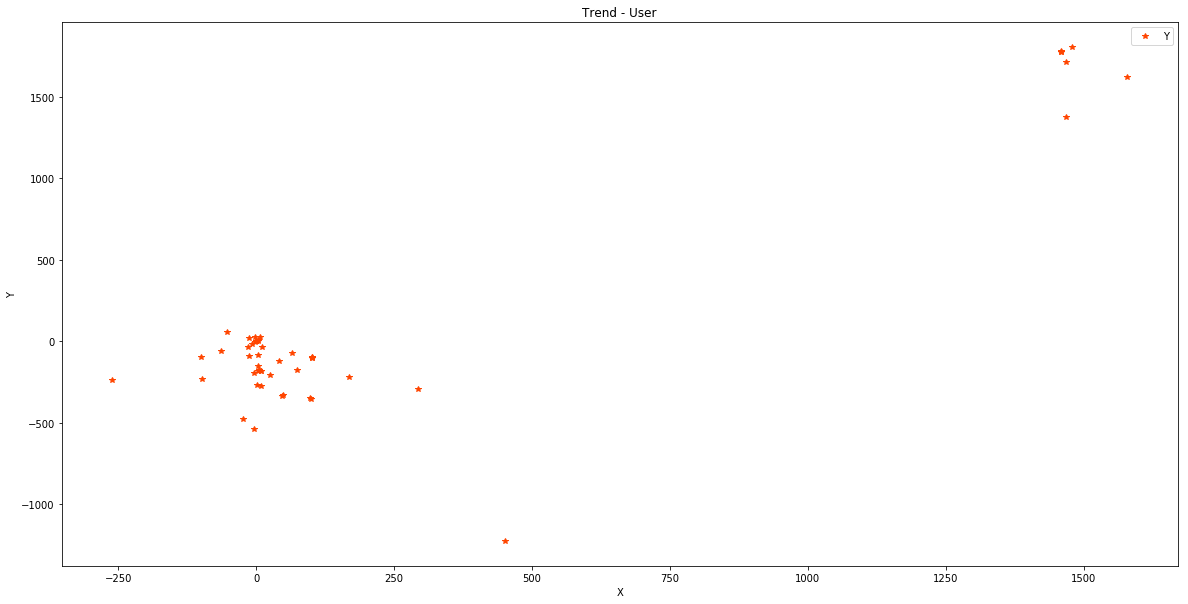

In [74]:
#Plot the significant places
#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(sigplc_df["ClusterMeanLat"][0])
origin_lon = math.radians(sigplc_df["ClusterMeanLon"][0])
sigplc_df = sigplc_df.reset_index(drop=True)

#assign the first lat and log as the base for the plot i.e. origin
origin_lat = math.radians(sigplc_df["ClusterMeanLat"][0])
origin_lon = math.radians(sigplc_df["ClusterMeanLon"][0])

#convert each lat and lon into x and y for the plot w.r.t origin
EARTH_RAD = 6378100
sigplc_df['X'] = 0.0
sigplc_df['Y'] = 0.0
for i in range(0, len(sigplc_df)):
    x = 0
    y = 0
    current_lat = math.radians(sigplc_df["ClusterMeanLat"][i])
    current_lon = math.radians(sigplc_df["ClusterMeanLon"][i])
    x = ((math.cos(current_lat) + math.cos(origin_lat))/2) * EARTH_RAD * (current_lon - origin_lon) * math.pi / 180
    y = (current_lat - origin_lat)* math.pi/180 * EARTH_RAD
    sigplc_df.at[i, 'X'] = x
    sigplc_df.at[i, 'Y'] = y

#plot the x and y's
sigplc_df.plot(x='X', y= 'Y' , style='*', figsize=(20,10), color='orangered')
plt.title('Trend - User')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()